In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('./train.csv',delimiter=',')
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F

In [2]:
x=data.iloc[:,[2,4,5,6,7,8,9,11]]
y=data.iloc[:,[1]]

In [3]:
x=x.fillna(value=x.median(axis=0,skipna='True'))

In [4]:
all=pd.concat([x,y],axis=1)

In [5]:
np.where(all.isnull()==True)

(array([ 61, 829], dtype=int64), array([7, 7], dtype=int64))

In [6]:
all=all.dropna(axis=0,how='any')

In [7]:
x=all.iloc[:,0:-1]
y=all.iloc[:,[-1]]

In [8]:
x=x.iloc[:,[0,1,2,3,4,6,7]]

In [9]:
x=pd.get_dummies(x,columns=['Pclass','Sex','Embarked'])

In [10]:
from sklearn import preprocessing
aa=preprocessing.scale(x.iloc[:,[0,3]])
x.iloc[:,0]=aa[:,0]
x.iloc[:,3]=aa[:,1]
x

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.563674,1,0,-0.500240,0,0,1,0,1,0,0,1
1,0.669217,1,0,0.788947,1,0,0,1,0,1,0,0
2,-0.255451,0,0,-0.486650,0,0,1,1,0,0,0,1
3,0.438050,1,0,0.422861,1,0,0,1,0,0,0,1
4,0.438050,0,0,-0.484133,0,0,1,0,1,0,0,1
5,-0.101340,0,0,-0.475913,0,0,1,0,1,0,1,0
6,1.902108,0,0,0.397946,1,0,0,0,1,0,0,1
7,-2.104788,3,1,-0.221900,0,0,1,0,1,0,0,1
8,-0.178396,0,2,-0.422057,0,0,1,1,0,0,0,1
9,-1.180120,1,0,-0.040787,0,1,0,1,0,1,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y)

In [12]:
import torch
from torch.utils import data
from torch.autograd import Variable
import torch.nn.functional as F

In [13]:
batch_size=20
train=pd.concat([X_train,y_train],axis=1)
train=train.values.reshape(np.size(train,0),-1)
train=Variable(torch.Tensor([train]))


test=pd.concat([X_test,y_test],axis=1)
test=test.values.reshape(np.size(test,0),-1)
test=Variable(torch.Tensor([test]))


In [14]:
class Titannic(Dataset):
    def __init__(self):
        
        x=X_train
        x=x.values.reshape(np.size(x,0),-1)
        #self.x_data=Variable(torch.Tensor([x]))
        self.x_data=torch.from_numpy(x)
        y=y_train
        y=y.values.reshape(np.size(y),-1)
        #self.y_data=Variable(torch.Tensor([y]))
        self.y_data=torch.from_numpy(y)
        self.len=y.shape[0]
    
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [15]:
dataset=Titannic()
train_loader=torch.utils.data.DataLoader(dataset=dataset,
                                         batch_size=batch_size,
                                         shuffle=True,num_workers=0)

In [16]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1=torch.nn.Linear(12,500)
        self.l2=torch.nn.Linear(500,200)
        self.l3=torch.nn.Linear(200,20)
        self.l4=torch.nn.Linear(20,1)
        self.sigmoid=torch.nn.Sigmoid()
        
        
    def forward(self,x):
        out1=F.relu(self.l1(x))
        out2=F.relu(self.l2(out1))
        out3=F.relu(self.l3(out2))
        y_pred=self.sigmoid(self.l4(out3))
        
        
        return y_pred

In [17]:
model=Model()
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

In [18]:
X_test=X_test.values
X_test=Variable(torch.Tensor([X_test]))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


0 0 tensor(0.7059)
0 1 tensor(0.6939)
0 2 tensor(0.6894)
0 3 tensor(0.7040)
0 4 tensor(0.6853)
0 5 tensor(0.6857)
0 6 tensor(0.6716)
0 7 tensor(0.6818)
0 8 tensor(0.6549)
0 9 tensor(0.6808)
0 10 tensor(0.6479)
0 11 tensor(0.6601)
0 12 tensor(0.6222)
0 13 tensor(0.6549)
0 14 tensor(0.7003)
0 15 tensor(0.7119)
0 16 tensor(0.6521)
0 17 tensor(0.6541)
0 18 tensor(0.6791)
0 19 tensor(0.6630)
0 20 tensor(0.6519)
0 21 tensor(0.6187)
0 22 tensor(0.5994)
0 23 tensor(0.6062)
0 24 tensor(0.7135)
0 25 tensor(0.6032)
0 26 tensor(0.5933)
0 27 tensor(0.6453)
0 28 tensor(0.5804)
0 29 tensor(0.6630)
0 30 tensor(0.6885)
0 31 tensor(0.5924)
0 32 tensor(0.5484)
0 33 tensor(0.4647)

The rightness in epoch0 is 0.5919282511210763

1 0 tensor(0.5889)
1 1 tensor(0.5791)
1 2 tensor(0.6972)
1 3 tensor(0.4842)
1 4 tensor(0.5258)
1 5 tensor(0.7233)
1 6 tensor(0.5904)
1 7 tensor(0.5461)
1 8 tensor(0.6219)
1 9 tensor(0.5420)
1 10 tensor(0.5466)
1 11 tensor(0.4992)
1 12 tensor(0.5679)
1 13 tensor(0.5598)
1 14 tensor(

11 30 tensor(0.4021)
11 31 tensor(0.4475)
11 32 tensor(0.2781)
11 33 tensor(0.6140)

The rightness in epoch11 is 0.7847533632286996

12 0 tensor(0.4352)
12 1 tensor(0.2980)
12 2 tensor(0.3440)
12 3 tensor(0.5389)
12 4 tensor(0.4174)
12 5 tensor(0.4041)
12 6 tensor(0.5831)
12 7 tensor(0.4751)
12 8 tensor(0.5501)
12 9 tensor(0.3130)
12 10 tensor(0.3417)
12 11 tensor(0.2245)
12 12 tensor(0.3192)
12 13 tensor(0.5587)
12 14 tensor(0.5777)
12 15 tensor(0.6266)
12 16 tensor(0.3339)
12 17 tensor(0.3338)
12 18 tensor(0.3892)
12 19 tensor(0.2271)
12 20 tensor(0.6657)
12 21 tensor(0.2845)
12 22 tensor(0.3791)
12 23 tensor(0.3834)
12 24 tensor(0.6915)
12 25 tensor(0.4005)
12 26 tensor(0.3223)
12 27 tensor(0.4385)
12 28 tensor(0.3585)
12 29 tensor(0.3689)
12 30 tensor(0.2757)
12 31 tensor(0.2880)
12 32 tensor(0.4971)
12 33 tensor(0.2282)

The rightness in epoch12 is 0.8430493273542601

13 0 tensor(0.5310)
13 1 tensor(0.4292)
13 2 tensor(0.4700)
13 3 tensor(0.3574)
13 4 tensor(0.2839)
13 5 tensor(0.

23 16 tensor(0.2471)
23 17 tensor(0.2490)
23 18 tensor(0.4559)
23 19 tensor(0.4830)
23 20 tensor(0.2529)
23 21 tensor(0.3622)
23 22 tensor(0.3397)
23 23 tensor(0.3451)
23 24 tensor(0.4538)
23 25 tensor(0.5062)
23 26 tensor(0.5372)
23 27 tensor(0.3011)
23 28 tensor(0.6496)
23 29 tensor(0.5043)
23 30 tensor(0.4281)
23 31 tensor(0.3473)
23 32 tensor(0.3575)
23 33 tensor(0.3884)

The rightness in epoch23 is 0.8340807174887892

24 0 tensor(0.6274)
24 1 tensor(0.4175)
24 2 tensor(0.3050)
24 3 tensor(0.6847)
24 4 tensor(0.3563)
24 5 tensor(0.1603)
24 6 tensor(0.4394)
24 7 tensor(0.5784)
24 8 tensor(0.7749)
24 9 tensor(0.2949)
24 10 tensor(0.2451)
24 11 tensor(0.3327)
24 12 tensor(0.3951)
24 13 tensor(0.5095)
24 14 tensor(0.2355)
24 15 tensor(0.3607)
24 16 tensor(0.1459)
24 17 tensor(0.5693)
24 18 tensor(0.4327)
24 19 tensor(0.4312)
24 20 tensor(0.4663)
24 21 tensor(0.1621)
24 22 tensor(0.2287)
24 23 tensor(0.2633)
24 24 tensor(0.2383)
24 25 tensor(0.1863)
24 26 tensor(0.2857)
24 27 tensor(0.2

35 1 tensor(0.2792)
35 2 tensor(0.1429)
35 3 tensor(0.2245)
35 4 tensor(0.1734)
35 5 tensor(0.1040)
35 6 tensor(0.4216)
35 7 tensor(0.2927)
35 8 tensor(0.2260)
35 9 tensor(0.5399)
35 10 tensor(0.4637)
35 11 tensor(0.3412)
35 12 tensor(0.7205)
35 13 tensor(0.2986)
35 14 tensor(0.2036)
35 15 tensor(0.4192)
35 16 tensor(0.5555)
35 17 tensor(0.4172)
35 18 tensor(0.6630)
35 19 tensor(0.4122)
35 20 tensor(0.1653)
35 21 tensor(0.2204)
35 22 tensor(0.5561)
35 23 tensor(0.3652)
35 24 tensor(0.3543)
35 25 tensor(0.6659)
35 26 tensor(0.3540)
35 27 tensor(0.4603)
35 28 tensor(0.3790)
35 29 tensor(0.2837)
35 30 tensor(0.4353)
35 31 tensor(0.1850)
35 32 tensor(0.4670)
35 33 tensor(0.2473)

The rightness in epoch35 is 0.8430493273542601

36 0 tensor(0.4007)
36 1 tensor(0.2762)
36 2 tensor(0.5992)
36 3 tensor(0.3445)
36 4 tensor(0.3799)
36 5 tensor(0.5344)
36 6 tensor(0.5557)
36 7 tensor(0.2104)
36 8 tensor(0.2760)
36 9 tensor(0.4936)
36 10 tensor(0.3309)
36 11 tensor(0.4228)
36 12 tensor(0.2476)
36 1

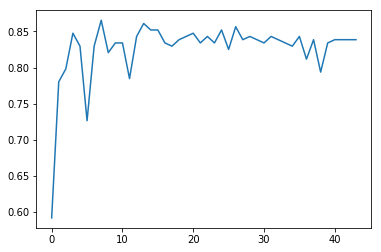

In [19]:
aa=np.zeros((44,1))
import matplotlib.pyplot as plt
ii=int(np.size(x,0)/batch_size) #浮点型变整型
for epoch in range(ii):
    for i,data in enumerate(train_loader,0):
        inputs,labels=data
        
        #这一段的问题在于inputs和labels利用P7审查，发现输入输出都为三维tensor，可能跟读入方式pandas有关有关系，
        inputs=inputs.numpy()
        inputs=Variable(torch.Tensor([inputs]))
        labels=labels.numpy()
        labels=Variable(torch.Tensor([labels]))
        
        y_pred=model(inputs)
        loss=criterion(y_pred,labels)
        print(epoch,i,loss.data[0])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    pred=model(X_test)
    result=np.where(pred>0.5,1,0)
    rightness=np.size(np.nonzero(result==y_test.values),1)/np.size(result,1)
    aa[epoch]=rightness
    print('\nThe rightness in epoch{} is {}\n'.format(epoch,rightness))

    

plt.plot(range(44),aa)
plt.show()


# 1)返回生成随机数的原始种子
# 2)返回随机生成器状态

In [22]:
torch.initial_seed()
torch.get_rng_state()

1570434141

# 1)保存训练完的网络的各层参数（即weights和bias)
# 2)加载保存到path中的各层参数到神经网络

In [30]:
torch.save(model.state_dict(),'./net_parameter')
model.load_state_dict(torch.load('./net_parameter'))